In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Calculate the time autocorrelation function for $m$
Used 1000 spins and 20e6 sweeps

In [7]:
autocor = np.loadtxt('autocorrelation-1000.dat')

23.050299424363537

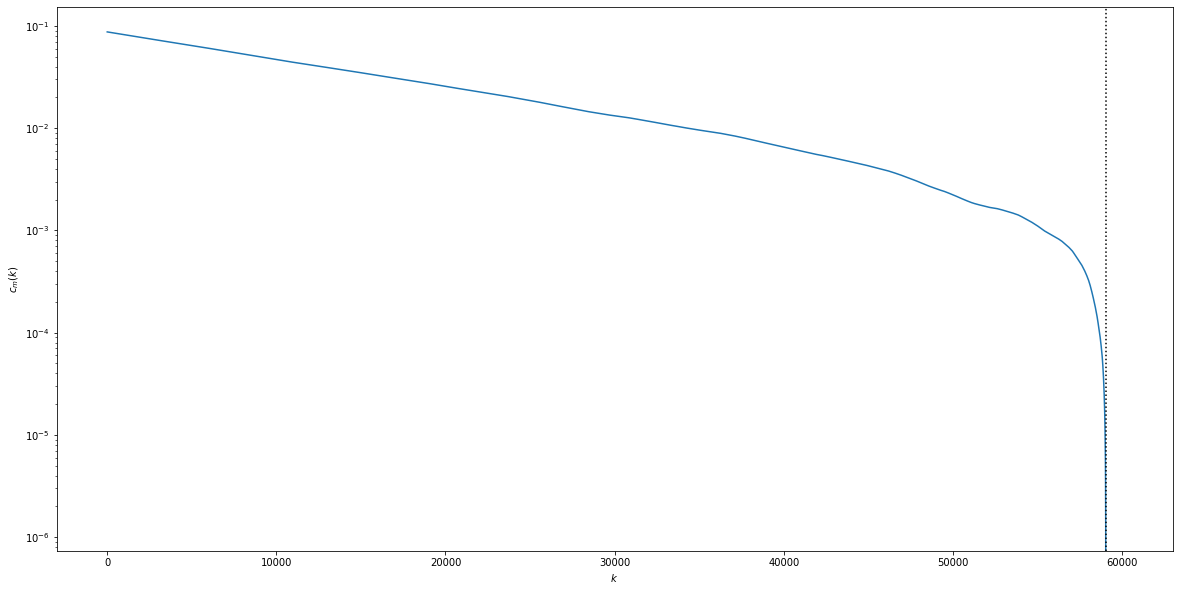

In [8]:
fig, ax = plt.subplots()
ax.plot(autocor[:6000, 0], autocor[:6000, 1])
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$c_m(k)$")
fig.set_size_inches((20, 10))
ax.axvline(x=59050, color='k', linestyle=':')
variance = 0.26491475917335644
real_variance = variance/autocor[:,0].shape[0] * sum(autocor[:5900, 0])
real_variance

# Correlation of the spins
## Analytic value
To get an easier calculation, assume $H=0$ for now. This immediately implies $\cot(2 \phi) = 0$, which is the case, if $2 \phi = \frac{\pi}{2}$, which coincides with nice values of sin and cos. Effectively, we gain:
$$ \langle s_i s_j \rangle = \left( \frac{\lambda_-}{\lambda_+} \right)^{j-i}.$$
But $\lambda$ also simplifies significantly to $\lambda_{\pm} = e^{\beta J} \pm e^{-\beta J}$ and since we set $\beta=1$ and $J=1$, we get:
$$ \langle s_i s_j \rangle = \tanh(1) ^{j-i}.$$
Fixing $i=1$ we get analytically:

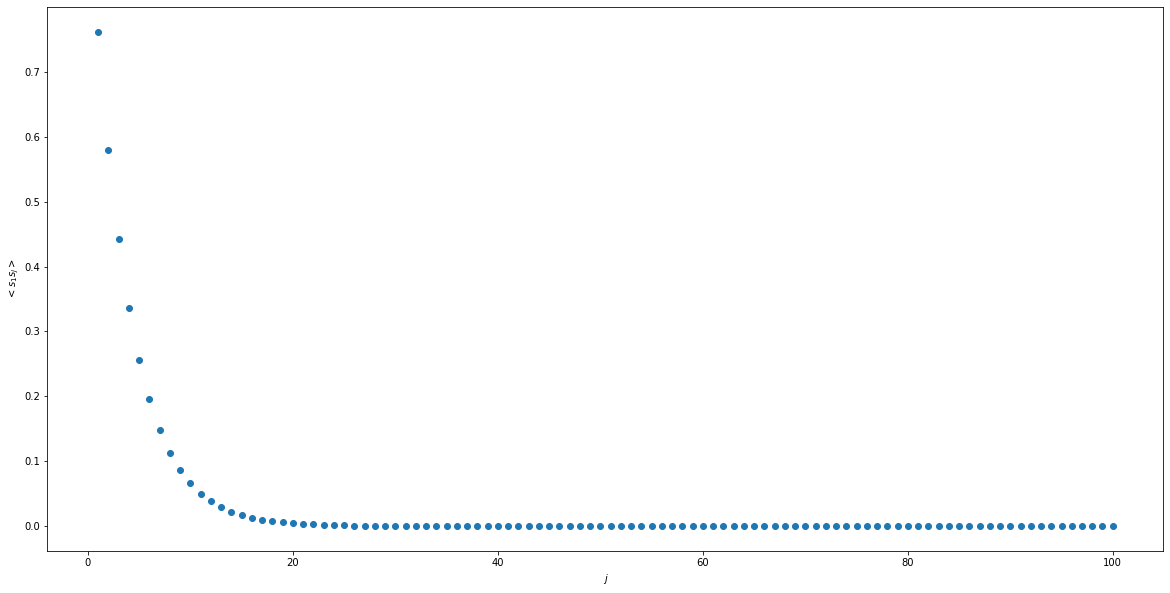

In [9]:
js = np.arange(1, 101)
cors = np.tanh(1)**js

fig, ax = plt.subplots()
ax.scatter(js, cors)
plt.xlabel("$j$")
plt.ylabel("$<s_1s_j>$")
fig.set_size_inches((20, 10))

## Simulated value for $n=100$
In this case we used no periodic boundary conditions. 
Here we use 2e6 sweeps.

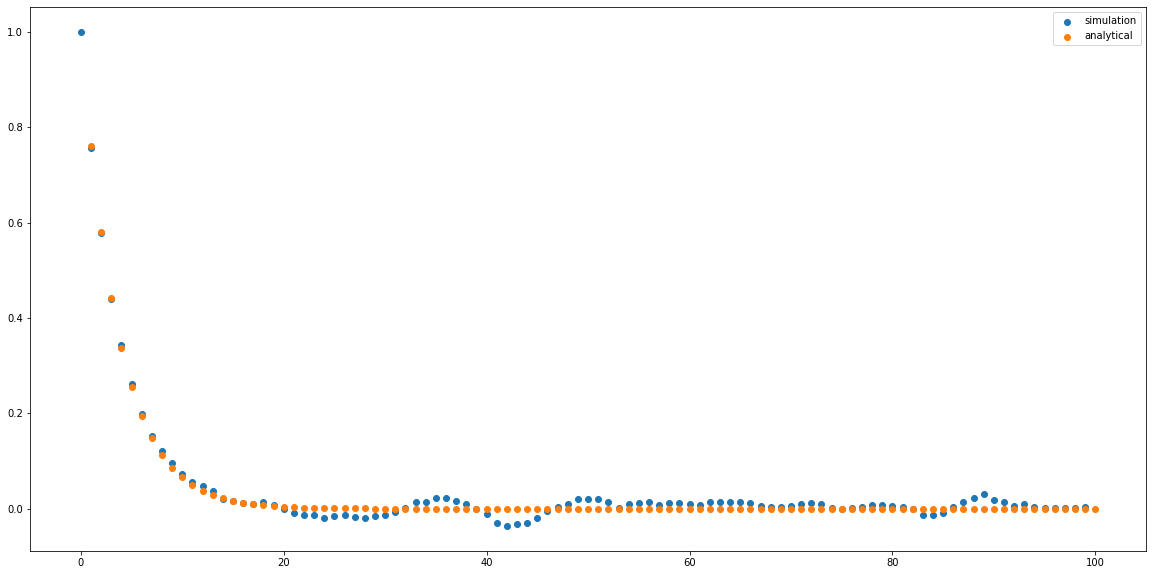

In [19]:
sim_cor = np.loadtxt('correlation-100.dat')
fig, ax = plt.subplots()

ax.scatter(sim_cor[:, 0], sim_cor[:, 1])
ax.scatter(js, cors)
fig.set_size_inches((20, 10))
plt.legend(("simulation", "analytical"))

## Simulated value for $n=1.000$
Here 20e6 sweeps had to be used for good data

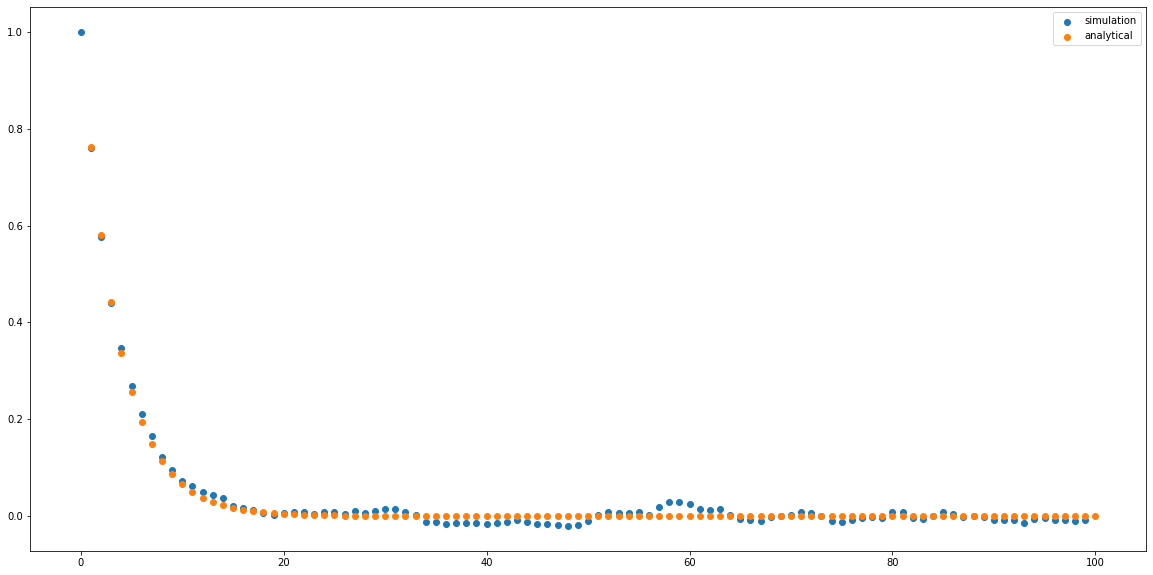

In [20]:
sim_cor = np.loadtxt('correlation-1000.dat')
fig, ax = plt.subplots()

ax.scatter(sim_cor[:100, 0], sim_cor[:100, 1])
ax.scatter(js, cors)
fig.set_size_inches((20, 10))
plt.legend(("simulation", "analytical"))

## Simulated value for $n=10.000$


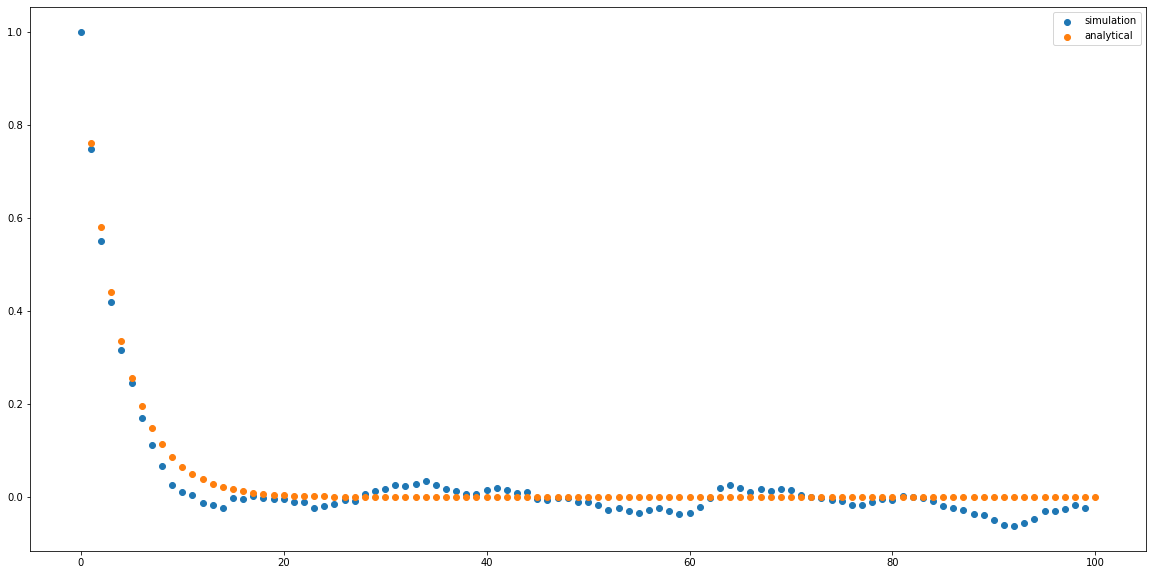

In [21]:
sim_cor = np.loadtxt('spin-corr-10000.dat')
fig, ax = plt.subplots()

ax.scatter(sim_cor[:100, 0], sim_cor[:100, 1])
ax.scatter(js, cors)
fig.set_size_inches((20, 10))
plt.legend(("simulation", "analytical"))

# Spin correlation for different $H$
with no periodic boundary conditions, for 30 spins at $N=10e6$ sweeps

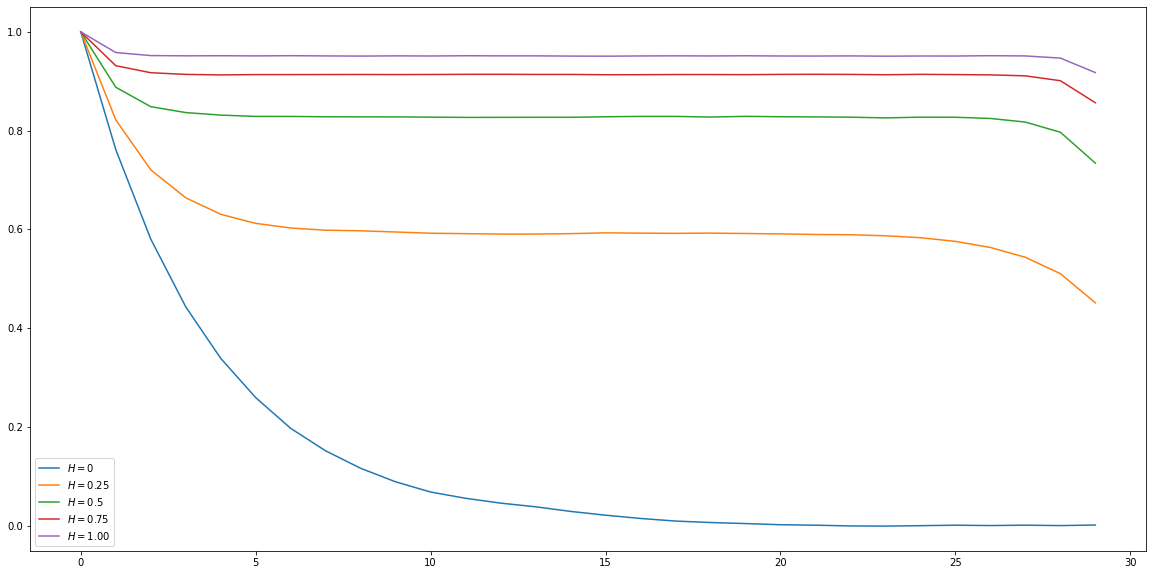

In [13]:
spin000 = np.loadtxt("spin-corr-0.dat")
spin025 = np.loadtxt("spin-corr-1.dat")
spin050 = np.loadtxt("spin-corr-2.dat")
spin075 = np.loadtxt("spin-corr-3.dat")
spin100 = np.loadtxt("spin-corr-4.dat")

hs = spin000[:, 0]

fig, ax = plt.subplots()
ax.plot(hs, spin000[:, 1], hs, spin025[:, 1], hs, spin050[:, 1], hs, spin075[:, 1], hs, spin100[:, 1])
fig.set_size_inches((20, 10))
plt.legend(("$H=0$", "$H=0.25$", "$H=0.5$", "$H=0.75$", "$H=1.00$"))